# 4.10 Coding Etiquette & Excel Reporting Part 2

## Table of Contents:

### 1. Importing Libraries and Data
### 2. More Graphs
### 3. Exporting Data

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/isabelgonzalez/Desktop/achievement 4'

In [3]:
df=pd.read_pickle(os.path.join(path, 'data', 'prepared data', 'Final_combined_data.pkl'))

## 2. More Graphs

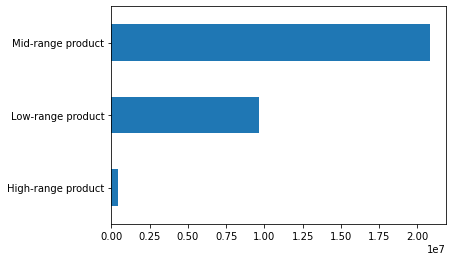

In [5]:
# creating bar chart for price range
price_bar=df['price_range'].value_counts().sort_values().plot.barh()

In [6]:
# cross checking if the most loyal customers have less days since prior order
cross_median_loyalty = df.groupby('loyalty_flag').agg({'median_of_days_since_prior_order':['mean']})
cross_median_loyalty

,median_of_days_since_prior_order
,mean
loyalty_flag,
Loyal customer,5.170693
New customer,18.048421
Regular customer,10.615556


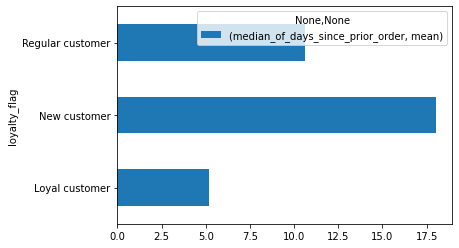

In [7]:
# creating bar chart for cross between loyalty flag and median days since last order
cross_median=cross_median_loyalty.plot(kind='barh')

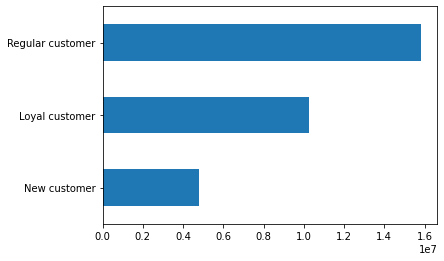

In [8]:
# creating bar chart for loyalty bar
loyalty_bar=df['loyalty_flag'].value_counts().sort_values().plot.barh()

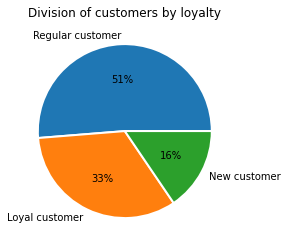

In [9]:
# creating pie chart for loyalty flag column
pieee = df['loyalty_flag'].value_counts()
pie_loyalty_customers = pieee.plot.pie(autopct=('%1.0f%%'),
                                      wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                      legend=None, ylabel='', title='Division of customers by loyalty')

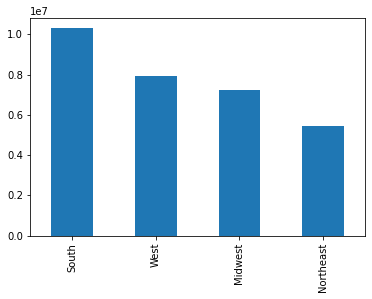

In [14]:
# creating bar chart for regions
region_bar=df['region'].value_counts().plot.bar()

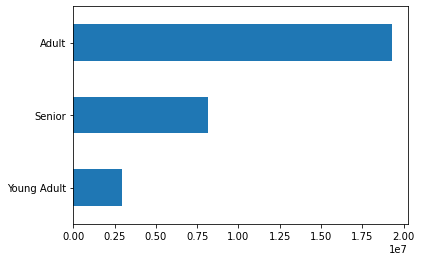

In [15]:
# creating bar chart for age groups
age_bar=df['age_group'].value_counts().sort_values().plot.barh()

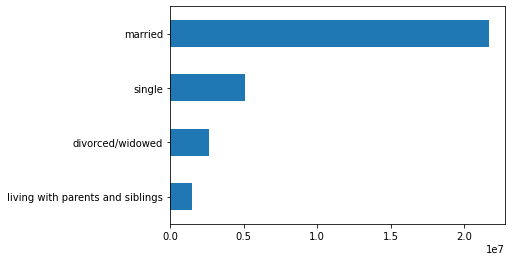

In [41]:
# creating bar chart for familty status
family_status=df['marital_status'].value_counts().sort_values().plot.barh()

In [63]:
# creating profiling variables for the Income column
#Low income ranges from 0-53,000
df.loc[df['income'] < 53000, 'income_class'] = 'Low Income'

In [64]:
#Middle income ranges from 53,000-110000
df.loc[(df['income'] >= 53000) & (df['income'] < 110000), 'income_class'] = 'Middle Income'

In [65]:
#High income ranges from 110000 and above
df.loc[df['income'] >= 110000, 'income_class'] = 'High Income'

In [66]:
# checking counts
df['income_class'].value_counts()

Middle Income    15452164
High Income      11546318
Low Income        3901314
Name: income_class, dtype: int64

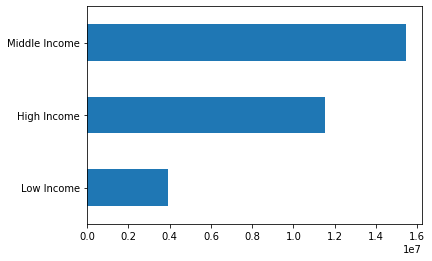

In [67]:
# creating bar chart for income groups
income_bar=df['income_class'].value_counts().sort_values().plot.barh()

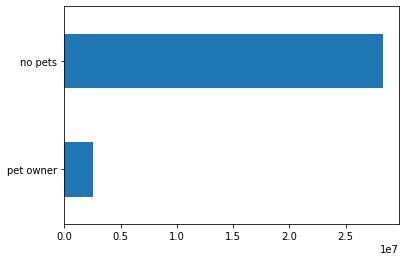

In [16]:
# creating bar chart for pet owners
pets_bar=df['pets'].value_counts().sort_values().plot.barh()

In [7]:
# cross checking age groups and pet owners
crosstab_age_dep = pd.crosstab(df['age_group'], df['department'], dropna = False)
crosstab_age_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,
Adult,5671841,436208,21542,160182,1113621,513085,420106,632971,1734654,56641,3235958,90457,266720,628663,1323393,418394,20739,1608625,701249,258363
Senior,2408104,186630,8946,67199,472383,217316,175296,267509,728549,25115,1368072,36693,111052,265199,564250,181150,8945,684020,295997,106204
Young Adult,860551,65892,3348,24461,169094,78524,64858,96056,260711,10291,493046,14418,39543,94465,201204,64584,3234,241114,105975,39011


In [24]:
# copying to clipbopard
crosstab_age_dep.to_clipboard()

In [18]:
# makeing crosstab between income class and product ranges
income_prices = pd.crosstab(df['income_class'], df['price_range'], dropna = False)
income_prices

price_range,High-range product,Low-range product,Mid-range product
income_class,,,
High Income,165833,3435740,7944745
Low Income,22934,1576071,2302309
Middle Income,209186,4644513,10598465


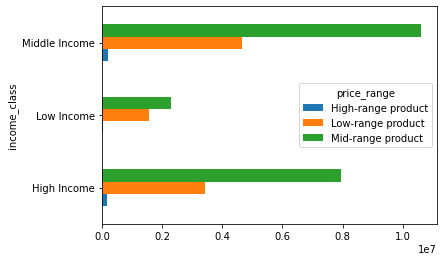

In [23]:
# creating bar chart cross between income class and product ranges
income_range_bar=income_prices.plot(kind='barh')

## 3. Exporting Data

In [17]:
price_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_price_bar.png'))

In [18]:
loyalty_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_loyalty_bar.png'))

In [19]:
cross_median.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_median_loyalty_bar.png'))

In [20]:
pie_loyalty_customers.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_loyalty_pie.png'))

In [21]:
region_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_region_bar.png'))

In [22]:
age_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_age_bar.png'))

In [23]:
family_status.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_family_status_bar.png'))

In [68]:
income_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_income_bar.png'))

In [17]:
pets_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_pet_bar.png'))

In [25]:
income_range_bar.figure.savefig(os.path.join(path, 'analysis','visualizations', '4.10_income_price_bar.png'))

In [71]:
df.to_pickle(os.path.join(path, 'data','prepared Data', 'Final_combined_data.pkl'))